In [1]:
#hide
import matplotlib.pyplot as plt
import proplot as plot
plot.rc['figure.facecolor'] = 'white'

# Computation of the matched envelope of the Danilov distribution
> A summary of my first peer-reviewed publication.
- toc: true 
- badges: false
- comments: true
- categories: [accelerators, space charge, differential equations]

My first peer-reviewed paper, titled [*Computation of the matched envelope of the Danilov distribution*](https://doi.org/10.1103/PhysRevAccelBeams.24.044201) {% cite Hoover2021 %}, was published in Physical Review Accelerators and Beams (PRAB) at the end of April. I thought I would summarize the results of the paper and share the code I used to generate those results. I'll try to focus on the main results to avoid re-writing the entire paper here.

## Self-consistent beams

This work falls under the topic of *self-consistent beams*; I'll start by defining this term. The posts I've written on [space charge](https://austin-hoover.github.io/blog/physics/accelerators/simulation/space%20charge/2021/02/22/PIC.html) as well as [coupled motion](https://austin-hoover.github.io/blog/physics/accelerators/coupling/2021/01/25/coupled_parametric_oscillators.html) may be helpful.

### Definition and attractive properties

We define a beam to be self-consistent if it satisfies the following two conditions:
1. It gives to linear space charge forces.
2. The above point remains true as long as all external forces are linear.
Let's go over these points in turn.

#### 1. Linear space charge forces

Consider the following 2D beams and the radial electric fields they produce.

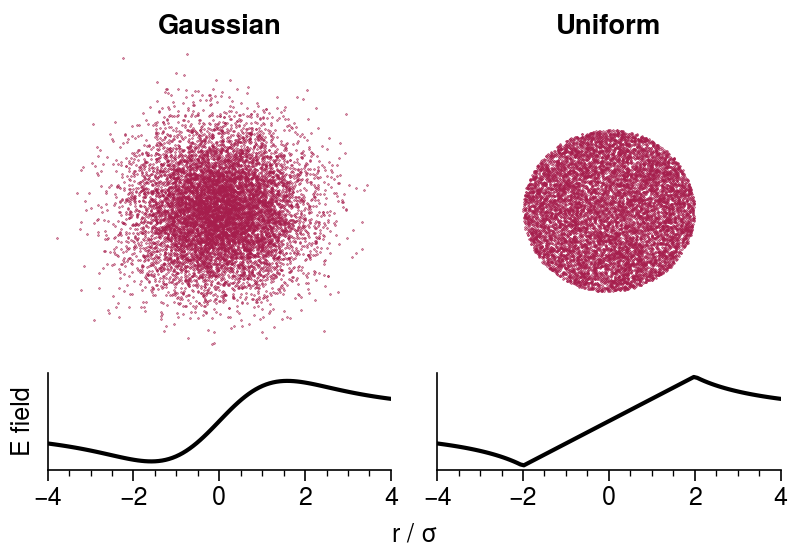

In [3]:
#collapse
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot

n = 10000

# Generate 2D Gaussian distribution
X1 = np.random.normal(scale=1, size=(n, 2))

# Generate 2D uniform density distribution
rho = 2 * np.sqrt(np.random.uniform(size=n))
phi = np.random.uniform(0, 2*np.pi, size=n)
X2 = np.vstack([rho * np.cos(phi), rho * np.sin(phi)]).T

# Plot distributions
fig, axes = plot.subplots(nrows=2, ncols=2, figsize=(4, 2.8), hspace=0, 
                          spany=False, height_ratios=[1, 0.3])
for ax, X in zip(axes[0, :], [X1, X2]):
    ax.scatter(X[:, 0], X[:, 1], s=0.05, c='pink9')
    for side in ['top', 'bottom', 'left', 'right']:
        ax.spines[side].set_visible(False)
axes[0, :].format(yticks=[], xlim=(-4, 4), ylim=(-4, 4), grid=False, 
                  toplabels=['Gaussian', 'Uniform'])

# Plot radial electric field
def Efield(r, kind='gaussian'):
    if r == 0:
        return 0
    if kind == 'uniform':
        return r / 4 if abs(r) <= 2 else 1 / r
    elif kind == 'gaussian':
        return (1 / r) * (1 - np.exp(-0.5 * r**2))
    
xvals = np.linspace(-4, 4, 100)
axes[1, 0].plot(xvals, [Efield(x, 'gaussian') for x in xvals], 'k-')
axes[1, 1].plot(xvals, [Efield(x, 'uniform') for x in xvals], 'k-');
axes[1, :].format(ylabel='E field', xlabel=r'r / $\sigma$', yticks=[], grid=False)
for ax in axes[1, :]:
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)

The beam on the right has a uniform density, and the resulting electric field is proportional to the radius within a sharp circular boundary. The beam on the left however, gives rise to an electric field which depends nonlinearly on the radius. This fact becomes important when considering *space charge forces*, i.e., the electric forces between particles in the beam. These forces are an annoyance in high-intensity machines because they change particle trajectories and decrease the beam quality (defined in a moment), and because they cause the beam evolution to become analytically intractable. This stems from the fact that space charge forces generally have a nonlinear dependence on the particle positions.

How exactly do nonlinear forces lead to these undesired effects?

### KV distribution

### Danilov distribution

## Computing the matched beam 

### Motivation 

### Challenges

### Solution 

## Example applications

### FODO lattice

### Splitting the tunes 

### Adding external coupling

## Conclusion

**References**

{% bibliography --cited %}